In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
# Getting hold of the prediction data
yolo_lstm_sheet_name = "YOLO_LSTM_simplified"
yolo_ffnn_sheet_name = "YOLO_FFNN_simplified"
rcnn_lstm_sheet_name = "RCNN_LSTM_simplified_test"
rcnn_ffnn_sheet_name = "RCNN_FFNN_simplified"

yolo_lstm = pd.read_excel('latlon results.xlsx', sheet_name=yolo_lstm_sheet_name, engine='openpyxl')
yolo_ffnn = pd.read_excel('latlon results.xlsx', sheet_name=yolo_ffnn_sheet_name, engine='openpyxl')
rcnn_lstm = pd.read_excel('latlon results.xlsx', sheet_name=rcnn_lstm_sheet_name, engine='openpyxl')
rcnn_ffnn = pd.read_excel('latlon results.xlsx', sheet_name=rcnn_ffnn_sheet_name, engine='openpyxl')

In [3]:
# Getting hold of the inference data
yolo_lstm_inf_path = "../new_test_inferences/YOLO+LSTMLatLon+LSTMCompass.csv" 
yolo_ffnn_inf_path = "../new_test_inferences/YOLO+FFNNLatLon+FFNNCompass.csv"
rcnn_lstm_inf_path = "../new_test_inferences/RCNN+LSTMLatLon+LSTMCompass.csv"
rcnn_ffnn_inf_path = "../new_test_inferences/RCNN+FFNNLatLon+FFNNCompass.csv"

def get_hold_of_inference(file_path):
    with open(file_path, "r") as file:
        reader = csv.DictReader(file)
        image_lat_lon_inference = []

        for row in reader:
            image_lat_lon_inference.append((float(row["Image Processing"]) + float(row["Lat Lon Processing"]) )*1000)
        average = np.mean(image_lat_lon_inference)
        std_dev = np.std(image_lat_lon_inference)
        
    return image_lat_lon_inference, average, std_dev

# Get inference data for all models
all_inference_data = {
    "YOLO_FFNN": get_hold_of_inference(yolo_ffnn_inf_path),
    "YOLO_LSTM": get_hold_of_inference(yolo_lstm_inf_path),
    "RCNN_FFNN": get_hold_of_inference(rcnn_ffnn_inf_path),
    "RCNN_LSTM": get_hold_of_inference(rcnn_lstm_inf_path)
}

# Prepare the mean and standard deviation for each model
# labels = ["YOLO_LSTM", "YOLO_FFNN", "RCNN_LSTM", "RCNN_FFNN"]
labels = ["YOLO_FFNN", "YOLO_LSTM", "RCNN_FFNN", "RCNN_LSTM"]
new_mean_size = [data[1] for data in all_inference_data.values()]  # Extract the mean values
new_mean_size_dev = [data[2] for data in all_inference_data.values()]  # Extract the standard deviation values
print("Mean Inference Times:", new_mean_size)
print("Standard Deviations:", new_mean_size_dev)

# x_pos for the bar chart
x_pos = np.arange(len(labels))

Mean Inference Times: [26.92608365958387, 28.032031587579034, 112.78413202274929, 112.72695491259748]
Standard Deviations: [81.89923247495294, 87.32640371025103, 52.318126587269944, 28.03624914793082]


In [4]:
data_frames = {
    'YOLO_FFNN': yolo_ffnn[['distance']].dropna(),
    'YOLO_LSTM': yolo_lstm[['distance']].dropna(),
    'RCNN_FFNN': rcnn_ffnn[['distance']].dropna(),
    'RCNN_LSTM': rcnn_lstm[['distance']].dropna(),
}
# Extracting the distance values from the DataFrames as lists
data_for_box_plot = [df['distance'].values for df in data_frames.values()]
labels = ["YOLO_FFNN", "YOLO_LSTM", "RCNN_FFNN", "RCNN_LSTM"]

/tmp/ipykernel_11282/3332003384.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytick_labels)


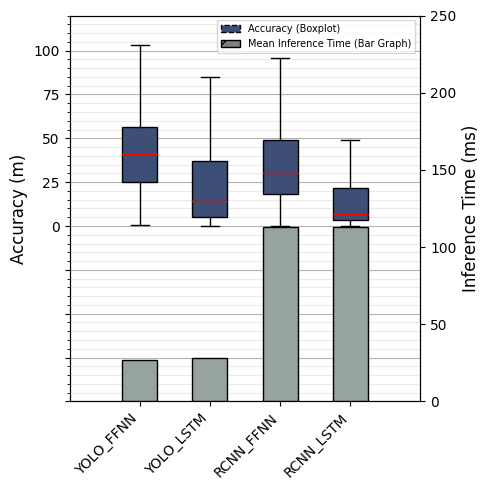

In [5]:
import matplotlib.patches as mpatches
import numpy as np

# Create the figure
fig, ax1 = plt.subplots(figsize=(5, 5))

# Adjust the positions (reduce spacing between models)
x_pos = np.array([0.3, 0.6, 0.9, 1.2])  # Positions for YOLO_FFNN, YOLO_LSTM, RCNN_FFNN, RCNN_LSTM
# You can try values like [1, 1.7, 2.4, 3.1] to reduce the spacing

# Boxplot
box_width = 0.15  # Box width
bp = ax1.boxplot(data_for_box_plot, positions=x_pos, labels=labels, showfliers=False, patch_artist=True, widths=box_width, medianprops=dict(color='red'))
for box in bp['boxes']:
    box.set_facecolor('#3D4F76')

# Y-axis labels
ax1.set_ylim(-100, 120)
yticks = ax1.get_yticks()
ytick_labels = [str(int(tick)) if tick >= 0 else "" for tick in yticks]
ax1.set_yticklabels(ytick_labels)
ax1.set_ylabel('Accuracy (m)', fontsize=12)

# Add grid
ax1.grid(visible=True, which='major', axis='y', color='#666666', linestyle='-', alpha=0.5)
ax1.minorticks_on()
ax1.grid(visible=True, which='minor', axis='y', color='#999999', linestyle='-', alpha=0.2)

# Rotate x-axis labels
plt.xticks(ha='right', rotation=45)
ax1.tick_params(which='minor', bottom=False, axis='x', labelsize=12)

# Twin axis for the bar plot
ax2 = ax1.twinx()

# Bar plot positions
bar_width = 0.15
bars = ax2.bar(x_pos, new_mean_size, error_kw={'ecolor': 'black', 'capsize': 6, 'elinewidth': 1, 'capthick': 1}, 
               color='#96a39f', edgecolor='black', linewidth=1, width=bar_width, label=labels, alpha=1)

# Y-axis for bar plot
ax2.set_ylim(0, 250)
ax2.set_ylabel('Inference Time (ms)', fontsize=12)
ax2.tick_params(which='minor', bottom=False, axis='x', labelsize=12)

plt.xlim([0, 1.5])  # Adjust this to control the spacing on the left and right

# Legend
box_patch = mpatches.Patch(facecolor='#3D4F76', edgecolor='black', linestyle='--', label='Accuracy (Boxplot)')
bar_patch = mpatches.Patch(facecolor='gray', hatch='/', edgecolor='black', label='Mean Inference Time (Bar Graph)')
plt.legend(handles=[box_patch, bar_patch], loc='upper right', fontsize=7)

plt.subplots_adjust(left=0.15, right=0.9)

# Tight layout and save
plt.tight_layout()
plt.savefig('AdjustedSpacing.png')
plt.savefig('AdjustedSpacing.pdf')
plt.show()

/tmp/ipykernel_60139/3080357260.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytick_labels)


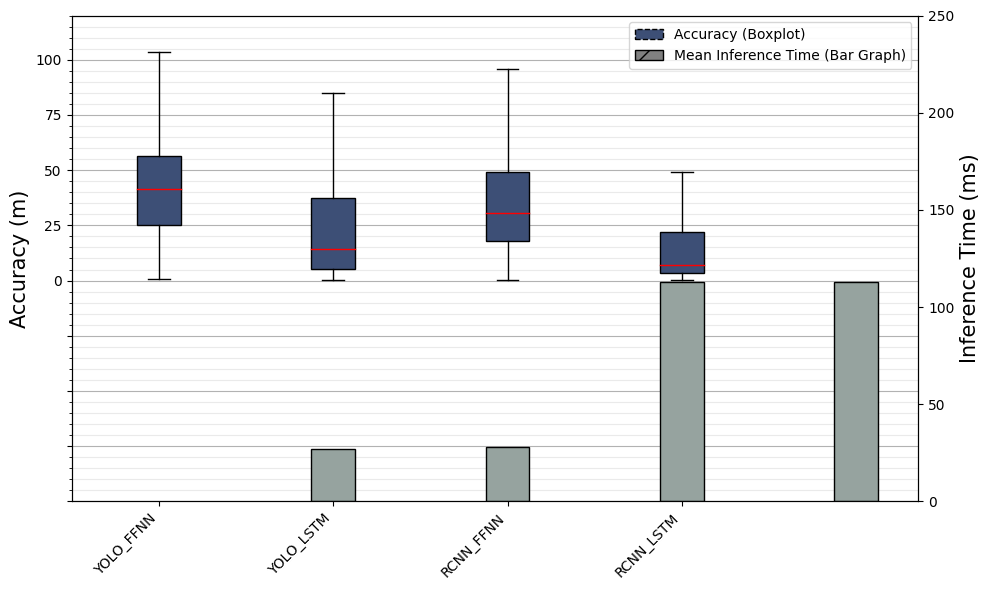

In [164]:
import matplotlib.patches as mpatches

fig, ax1 = plt.subplots(figsize=(10, 6))  

box_width = 0.5 * 0.5

# Boxplot
bp = ax1.boxplot(data_for_box_plot, labels=labels, showfliers=False, patch_artist=True, widths=box_width, medianprops=dict(color='red'))  # Create a box plot
bp['boxes'][0].set_facecolor('#3D4F76')
bp['boxes'][1].set_facecolor('#3D4F76')
bp['boxes'][2].set_facecolor('#3D4F76')
bp['boxes'][3].set_facecolor('#3D4F76')

# Setting y-axis limits and labels
ax1.set_ylim(-100, 120)  # Set the y-axis limit
# Get the current y-axis tick values
yticks = ax1.get_yticks()

# Modify the y-tick labels to hide values between -100 and 0
# Keep labels for positive values and change negative ones to empty strings
ytick_labels = [str(int(tick)) if tick >= 0 else "" for tick in yticks]

# Set the new y-tick labels
ax1.set_yticklabels(ytick_labels)
ax1.set_ylabel('Accuracy (m)', fontsize=15)

# Add grid
ax1.grid(visible=True, which='major', axis='y', color='#666666', linestyle='-', alpha=0.5)
ax1.minorticks_on()
ax1.grid(visible=True, which='minor', axis='y', color='#999999', linestyle='-', alpha=0.2)

# Rotate x-axis labels
plt.xticks(ha='right', rotation=45)
ax1.tick_params(which='minor', bottom=False, axis='x', labelsize=15)

# Create a twin axis for the bar plot
ax2 = ax1.twinx()

bar_width = 0.5 * 0.5

# Bar plot
bars = ax2.bar(x_pos + 1, new_mean_size, error_kw={'ecolor': 'black', 'capsize': 6, 'elinewidth': 1, 'capthick': 1}, 
               color='#96a39f', edgecolor='black', linewidth=1, width=bar_width, label=labels, alpha=1)
ax2.set_ylim(0, 250)  # Set the y-axis limit for inference times
ax2.set_ylabel('Inference Time (ms)', fontsize=15)
ax2.tick_params(which='minor', bottom=False, axis='x', labelsize=15)

box_patch = mpatches.Patch(facecolor='#3D4F76', edgecolor='black', linestyle='--', label='Accuracy (Boxplot)')
bar_patch = mpatches.Patch(facecolor='gray', hatch='/', edgecolor='black', label='Mean Inference Time (Bar Graph)')

# Setting up the legend
plt.legend(handles=[box_patch, bar_patch], loc='upper right')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('AccuracyVSInference.png')


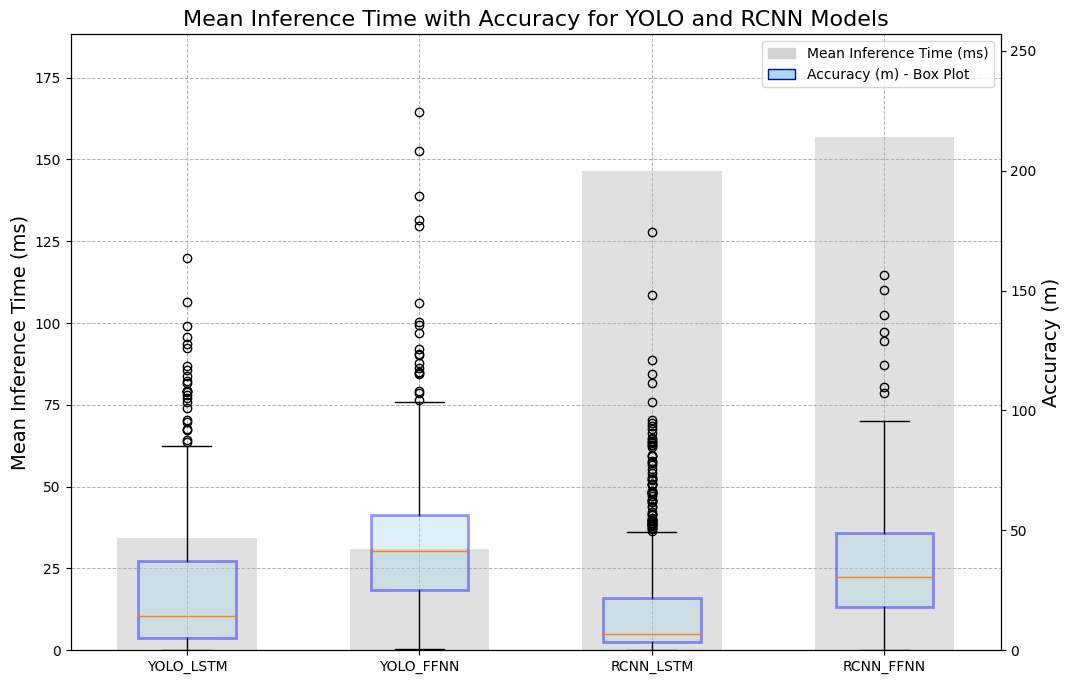

In [68]:
import matplotlib.patches as mpatches  # Import for custom legend patches

x_labels = ['YOLO_LSTM', 'YOLO_FFNN', 'RCNN_LSTM', 'RCNN_FFNN']

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Calculate average inference times (ms) for each model
avg_inference_times = {key: sum(val)/len(val) for key, val in all_inference_data.items()}

# Create figure and axis objects for the combined plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create the bar plot on the left y-axis
bar_width = 0.6  # Adjusting the bar width for better visual
bar_positions = range(len(avg_inference_times))  # X positions for bars
bars = ax1.bar(bar_positions, [val[1] for val in all_inference_data.values()], color='lightgrey', alpha=0.7, width=bar_width, zorder=1)
ax1.set_ylabel('Mean Inference Time (ms)', fontsize=14)
ax1.set_ylim(0, max([val[1] for val in all_inference_data.values()]) * 1.2)  # Adjusting y-axis limit for better visibility
ax1.grid(True, linestyle='--', linewidth=0.7, zorder=0)

# Create a second y-axis for the box plot (Accuracy)
ax2 = ax1.twinx()

# Align the box plot so it starts right above the tallest bar
ax2.set_ylim(0, max([val[1] for val in all_inference_data.values()]) + 100)

# Create the box plot for accuracy (distance), placed on top of the bar plot
boxplot = ax2.boxplot([df['distance'] for df in data_frames.values()], positions=bar_positions, widths=bar_width*0.7, patch_artist=True, zorder=2)

# Customize the box plot aesthetics to make it more visible and less intrusive
for box in boxplot['boxes']:
    box.set(color='blue', linewidth=2)
    box.set(facecolor='lightblue', alpha=0.4)  # Adjust alpha for transparency

ax2.set_ylabel('Accuracy (m)', fontsize=14)

# Customize the x-axis labels
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(x_labels)
plt.xticks(rotation=45, fontsize=12)

# Set the title for the plot
plt.title('Mean Inference Time with Accuracy for YOLO and RCNN Models', fontsize=16)

# Create custom legend
bar_patch = mpatches.Patch(color='lightgrey', label='Mean Inference Time (ms)')
box_patch = mpatches.Patch(facecolor='lightblue', edgecolor='blue', label='Accuracy (m) - Box Plot')

# Add the legend to the plot
plt.legend(handles=[bar_patch, box_patch], loc='upper right')

plt.savefig('YoloVSRCNN.png')
# Show the plot
plt.show()


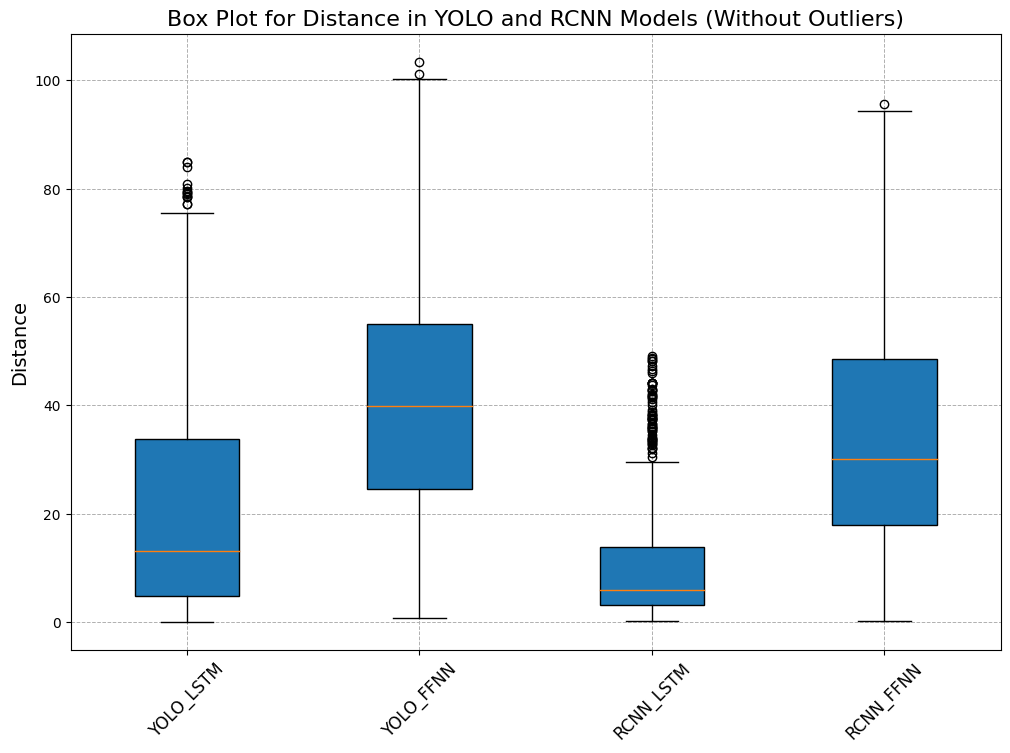

In [14]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Prepare data by removing outliers
data_frames = {
    'YOLO_LSTM': remove_outliers(yolo_lstm[['distance']], 'distance'),
    'YOLO_FFNN': remove_outliers(yolo_ffnn[['distance']], 'distance'),
    'RCNN_LSTM': remove_outliers(rcnn_lstm[['distance']], 'distance'),
    'RCNN_FFNN': remove_outliers(rcnn_ffnn[['distance']], 'distance')
}

# Create box plot for all the datasets without outliers
plt.figure(figsize=(12, 8))
plt.boxplot([df['distance'] for df in data_frames.values()], labels=data_frames.keys(), patch_artist=True)

# Customize plot
plt.title('Box Plot for Distance in YOLO and RCNN Models (Without Outliers)', fontsize=16)
plt.ylabel('Distance', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7)

# Show the plot
plt.show()


<Figure size 1200x800 with 0 Axes>

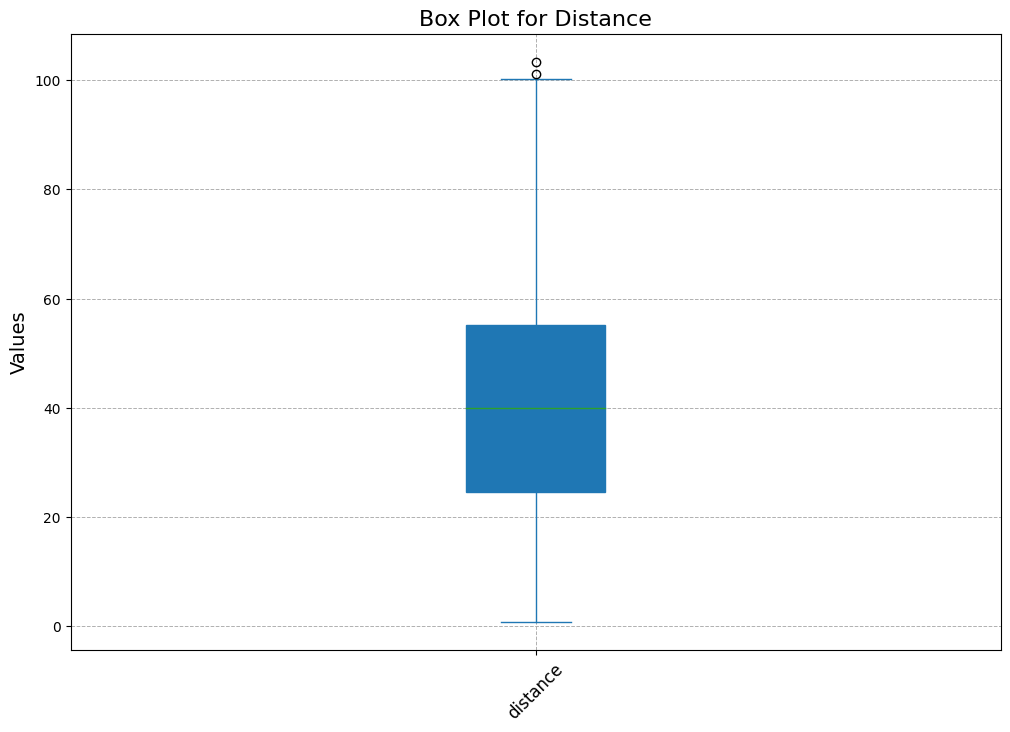

In [9]:
boxplot_data = yolo_ffnn[['distance']].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = boxplot_data['distance'].quantile(0.25)
Q3 = boxplot_data['distance'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
filtered_data = boxplot_data[(boxplot_data['distance'] >= lower_bound) & (boxplot_data['distance'] <= upper_bound)]

# Create a box plot for the filtered data
plt.figure(figsize=(12, 8))
filtered_data.plot(kind='box', grid=True, patch_artist=True, figsize=(12, 8))

# Customize plot
plt.title('Box Plot for Distance', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7)

# Show the plot
plt.show()

<Figure size 1000x700 with 0 Axes>

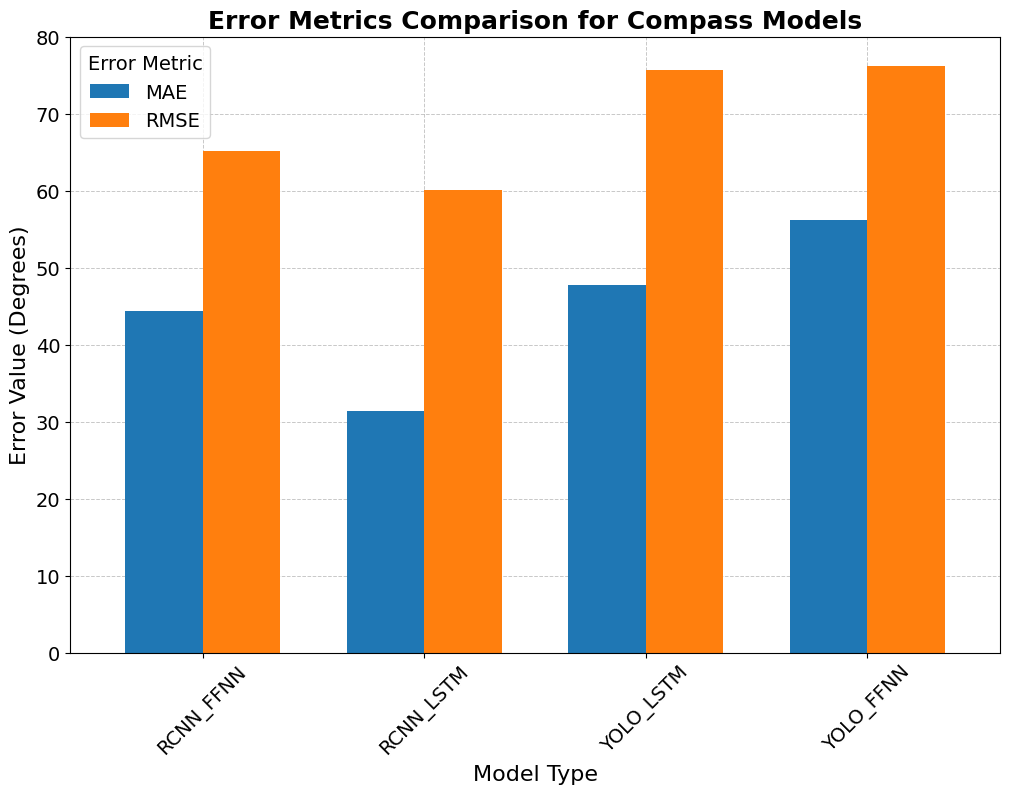

In [42]:
# Compass Test Data
RCNN_FFNN_CSV = "compass_test_data/RCNN_FFNN_compass.csv" 
RCNN_LSTM_CSV = "compass_test_data/RCNN_LSTM_compass.csv"
YOLO_LSTM_CSV = "compass_test_data/YOLO_LSTM_compass.csv"
YOLO_FFNN_CSV = "compass_test_data/YOLO_FFNN_compass.csv"

# Function to calculate errors
def calculate_errors(file_path):
    predicted = []
    expected = []
    with open(file_path, "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            predicted.append(float(row["predicted_heading"]))
            expected.append(float(row["expected_heading"]))
    
    # Convert lists to NumPy arrays
    predicted = np.array(predicted)
    expected = np.array(expected)
    
    # Calculate errors
    mae = mean_absolute_error(expected, predicted)
    mse = mean_squared_error(expected, predicted)
    rmse = np.sqrt(mse)
    
    return mae, rmse

# Calculate errors for each dataset
errors = {
    "RCNN_FFNN": calculate_errors(RCNN_FFNN_CSV),
    "RCNN_LSTM": calculate_errors(RCNN_LSTM_CSV),
    "YOLO_LSTM": calculate_errors(YOLO_LSTM_CSV),
    "YOLO_FFNN": calculate_errors(YOLO_FFNN_CSV)
}

# Convert the error data to a DataFrame for easier plotting
error_df = pd.DataFrame(errors, index=["MAE", "RMSE"])

# Plot the errors as a bar graph
plt.figure(figsize=(10, 7))  # Larger figure size for better clarity
ax = error_df.T.plot(kind='bar', width=0.7, figsize=(12, 8), grid=True, color=['#1f77b4', '#ff7f0e'])

# Customize the plot
plt.title('Error Metrics Comparison for Compass Models', fontsize=18, fontweight='bold')
plt.ylabel('Error Value (Degrees)', fontsize=16)
plt.xlabel('Model Type', fontsize=16)
plt.xticks(rotation=45, fontsize=14)  # Rotation for better label spacing
plt.yticks(fontsize=14)
plt.legend(fontsize=14, title="Error Metric", title_fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Softer gridlines for paper
ax.set_axisbelow(True)  # Grid lines behind bars for clarity

# Save the figure as a high-resolution image
plt.savefig('CompassModComparisonError.png', dpi=300, bbox_inches='tight', format='png')

# Show the plot
plt.show()